<a href="https://colab.research.google.com/github/tyslas/CS5265-tyslas-nfl-spread-line-outcomes/blob/main/NFLSpreadAndLineOutcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Project to predict future NFL Spread & Line outcomes

## Author: Tito Yslas

### Background
I enjoy watching the NFL and playing fantasy football. I also like to place bets on games using apps like FanDuel. The purpose of this project is to increase my understanding of the NFL betting market and possibly create a machine learning model to give myself an edge next season.

### Project Description
I found a dataset from Kaggle titled [NFL scores and betting data](https://www.kaggle.com/datasets/tobycrabtree/nfl-scores-and-betting-data?resource=download). This dataset has over 13,000 samples and 17 features. The goal is to use this dataset to train a model that will predict the winner of a given game.

### Performance Metric
For my performance metric, I will aim for the model to have at least 70% accuracy.

## Import Libraries

In [103]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Load Data

### Data Dictionary
- schedule_date: Date that the game took place. This column is a date in the format MM/DD/YYYY
- schedule_season: Year of the season began. NFL seasons start in the fall and end before the spring of the following year. So the 2023 season will refer to the years 2023-2024. This column is a number in the format YYYY
- schedule_week: Week of the NFL season. This column is either a number during regular season weeks or a string in playoff weeks. For the purposes of this project the playoff weeks will be converted to numbers and the schedule_playoff column will be used to determine whether the week is a playoff game or not
- schedule_playoff: This column is a boolean. FALSE is regular season and TRUE is playoffs
- team_home: Name of the home team. This column is a string
- score_home: Points scored by the home team. This column is a number
- score_away: Points scored by the away team. This column is a number
- winner: This column will be a feature derived from score_home and score_away columns to that will use one hot encoding - if team_home scores more points this will be a 1 - if team_home scores fewer points it will be a 0
- team_away: Name of the away team. This column is a string
- team_favorite_id: Acronym of the team that was determined most likely to win by the betting market. It is either two or three letters. For the purposes of this project this column will be changed to be either the team_home or team_away name
- team_home_favorite: this will represent the encoded team_favorite_id - if team_home is favored this column will be marked as a 1 - if it's a zero then we know that team_away is favored
- spread_favorite: The number of points that the favored team needs to win by for a bet placed on the spread of the favorite to win. This column will either be a negative number or zero
- over_under_line: The number of points that both teams combined need to score for a bet placed on the 'line' to win. This column is a positive number
- stadium: Name of the venue that the game is played
- stadium_neutral: This column is a boolean. FALSE is not a neutral venue and TRUE is a neutral venue - for the purposes of this project this column will be one hot encoded with a neutral venue being marked as a 1 and non-neutral marked as a 0
- weather_temperature: The temperature in Fahrenheit at the venue where the game is played. This column is a number
- weather_wind_mph: The speed of wind in miles per hour. This column is a number
- weather_humidity: The measurement of water vapor in the air during the game measured as a percentage. This column is a number
- weather_detail: Other information about the weather conditions - if the venue is indoor or the venue has a retractable roof. This column is a string


## Exploratory Data Analysis
### Questions to answer with EDA:
1. Which columns, if any, should I modify the data type to better train my model?
1. Which columns, if any, should I remove from the training and test data so that the model can be effectively trained?
1. Which columns, if any, should I remove or insert derived data for in the case that there is a lot of missing data?
1. What features could it make sense to introduce to improve the training and performance of my model?

In [104]:
# source files from github repo
!wget -O spreadspoke_scores.csv https://raw.githubusercontent.com/tyslas/CS5265-tyslas-nfl-spread-line-outcomes/main/spreadspoke_scores.csv
!wget -O data_dictionary.csv https://raw.githubusercontent.com/tyslas/CS5265-tyslas-nfl-spread-line-outcomes/main/data_dictionary.csv
!wget -O team_ids.py https://raw.githubusercontent.com/tyslas/CS5265-tyslas-nfl-spread-line-outcomes/main/team_ids.py
for file in os.listdir():
  print(file)

--2023-06-20 09:54:44--  https://raw.githubusercontent.com/tyslas/CS5265-tyslas-nfl-spread-line-outcomes/main/spreadspoke_scores.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1441380 (1.4M) [text/plain]
Saving to: ‘spreadspoke_scores.csv’

spreadspoke_scores. 100%[===================>]   1.37M  --.-KB/s    in 0.06s   

2023-06-20 09:54:44 (24.0 MB/s) - ‘spreadspoke_scores.csv’ saved [1441380/1441380]

--2023-06-20 09:54:44--  https://raw.githubusercontent.com/tyslas/CS5265-tyslas-nfl-spread-line-outcomes/main/data_dictionary.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HT

In [105]:
scores = pd.read_csv('spreadspoke_scores.csv')

In [106]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13516 entries, 0 to 13515
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   schedule_date        13516 non-null  object 
 1   schedule_season      13516 non-null  int64  
 2   schedule_week        13516 non-null  object 
 3   schedule_playoff     13516 non-null  bool   
 4   team_home            13516 non-null  object 
 5   score_home           13516 non-null  int64  
 6   score_away           13516 non-null  int64  
 7   team_away            13516 non-null  object 
 8   team_favorite_id     11037 non-null  object 
 9   spread_favorite      11037 non-null  float64
 10  over_under_line      11027 non-null  object 
 11  stadium              13516 non-null  object 
 12  stadium_neutral      13516 non-null  bool   
 13  weather_temperature  12309 non-null  float64
 14  weather_wind_mph     12293 non-null  float64
 15  weather_humidity     8468 non-null  

### Answer to Question 1
- I think that it makes sense to modify both team_home and team_away to have the same IDs as team_favorite_id to make it easier for the model to indentify when team_home is the same or different as team_favorite_id
- Currently Pandas is indentifying schedule_date as an object, it could make sense to see if there's a way for Pandas to indentify this as a date
- Currently Pandas is indentifying schedule_week as an object. This is because some of the data in this column is in string format. It could make sense to modify the data of this column that is in a string to only be in int64 format and use the schedule_playoff column to be the soe determination of whether or not the schedule_week is a playoff game
- Currently Pandas is indentifying the over_under_line column as an object data type despite the fact that it should be a float. I will explore how to ensure that this column's data type is correctly identified
- The stadium_neutral column is currently a boolean type, I think I will convert this to use one hot encoding instead

### Answer to Question 2
- Based on my initial examination, I'm not sure if it makes sense to remove any of my columns from the data set on which I will train my model

In [107]:
scores.isna().sum() # number of missing values for each column

schedule_date              0
schedule_season            0
schedule_week              0
schedule_playoff           0
team_home                  0
score_home                 0
score_away                 0
team_away                  0
team_favorite_id        2479
spread_favorite         2479
over_under_line         2489
stadium                    0
stadium_neutral            0
weather_temperature     1207
weather_wind_mph        1223
weather_humidity        5048
weather_detail         10597
dtype: int64

### Answer to Question 3
- the columns with missing data include team_favorite_id, spread_favorite, over_under_line, weather_temperature, weather_wind_mph, weather_humidity, and weather_detail. these columns have many missing values because this data was not collected in earlier seasons. for example, there is minimal team_favorite_id information collected from the 1978 schedule_season and previous to that likely because of the lack of public betting information before that time
- for the missing data I don't think that it makes sense to remove these columns, however it might make sense to only train and test on the observations from the 1979 schedule_season and beyond

### Answer to Question 4
- I think it makes sense to introduce/derive three different target columns for understanding the performance of the model
- The three target columns I am thinking about introducing are derived from score_home, score_away, and over_under_line
- These targets would be one hot encoded as team_home_win, team_home_cover_spread, and cover_line
- team_home_win would be a 1 if team_home wins or a 0 if they lose
- team_home_cover_spread would be a 1 if they cover the spread_favorite and a 0 if they don't
- cover_line would be a 1 if score_home + score_way is greater than the over_under_line and a 0 if it's less than

### Further EDA

In [108]:
# describe only works on the following numeric variables:
# schedule_season score_home score_away spread_favorite weather_temperature weather_wind_mph weather_humidity

display(scores.describe())

print('\nmedian summary:')
display(scores.median(numeric_only = True))

print('\nmode summary:')
display(scores.mode().iloc[0])


,schedule_season,score_home,score_away,spread_favorite,weather_temperature,weather_wind_mph,weather_humidity
count,13516.000000,13516.000000,13516.000000,11037.000000,12309.000000,12293.000000,8468.000000
mean,1996.082939,22.461897,19.784848,-5.385204,58.833211,7.689010,67.212801
std,16.144258,10.526423,10.165222,3.439617,15.538656,5.694124,15.796414
min,1966.000000,0.000000,0.000000,-26.500000,-6.000000,0.000000,4.000000
25%,1983.000000,15.000000,13.000000,-7.000000,48.000000,3.000000,57.000000
50%,1997.000000,22.000000,20.000000,-4.500000,62.000000,8.000000,69.000000
75%,2010.000000,29.000000,27.000000,-3.000000,72.000000,11.000000,79.000000
max,2022.000000,72.000000,62.000000,0.000000,97.000000,40.000000,100.000000



median summary:


schedule_season        1997.0
schedule_playoff          0.0
score_home               22.0
score_away               20.0
spread_favorite          -4.5
stadium_neutral           0.0
weather_temperature      62.0
weather_wind_mph          8.0
weather_humidity         69.0
dtype: float64


mode summary:


schedule_date                       1/1/12
schedule_season                     2021.0
schedule_week                            2
schedule_playoff                     False
team_home              San Francisco 49ers
score_home                            20.0
score_away                            17.0
team_away                   Dallas Cowboys
team_favorite_id                       PIT
spread_favorite                       -3.0
over_under_line                         41
stadium                     Giants Stadium
stadium_neutral                      False
weather_temperature                   72.0
weather_wind_mph                       0.0
weather_humidity                      74.0
weather_detail                      indoor
Name: 0, dtype: object

#### Findings
- `schedule_season` doesn't seem to give very meaningful information when presented with the Pandas describe function
- `score_home` has a higher mean, first-quartile, second-quartile, third-quartile, and max than `score_away` with only slightly more standard deviation, which implies that home teams have an edge - ceteris paribus
- `weather_temperature` and `weather_humidity` don't seem to have as big of a standard deviation as I expected
- `weather_wind_mph` has a big jump from the third-quartile up to the max. However, the mode is 0 mph, so it seems that high speed winds are not a regular occurence during games
- The summary statistics for `spread_favorite` are interesting because I normally think of the min and max values in terms of absolute values. However, in this case the smaller numbers indicate that that favored team is expected to win by a significant margin. We also see that the max is 0, which means the favored team is not really favored, if only slightly
- `spread_favorite` has a very big jump from the third-quartile to the minimum. This along with a median of -4.5 and a mode of -3 leads me to believe that favored teams are generally only favored by either a field goal or a touchdown. So odd-makers and bettors expect most games to be fairly close
- `schedule_date` does not seem to be the most helpful piece of data. However, it could make sense to derive a categorical variable from this column of `day_of_week`. I may also explore adding a one-hot encoded categorical variable of `month`.
- Along with deriving categorical variables from `schedule_date` it could make sense to convert the `schedule_week` column to a one-hot encoded categorical variable



#### Tasks for new Data Cleaning section
1. No extra data cleaning performed. However, I did decide to knock off the first 2500 rows of data earlier in the notebook (just below here). It probably doesn't make much sense to have that in the feature engineering section anyway
1. Along the same lines as above, it makes more sense to have conversion of columns `schedule_playoff` and `stadium_neutral` from boolean values to 1 and 0 in the data cleaning section
1. Ensure that the `over_under_line` is correctly recognized as a float instead of an object
1. Convert the `schedule_date` column to a date/time data type instead of an object data type
1. Convert all `team_home` and `team_away` entries to the acronym identifiers. In the feature engineering section this will simplify the creation of the `favorite_won` target variable
  - In future iterations I may want to preserve the `team_home` and `team_away` variables as they are and instead convert them into one-hot encoded categorical variables
1. Impute the values for `over_under_line`, `weather_temperature`, and `weather_wind_mph` with the median of these variables
1. There are too many missing values for `weather_humidity` (42.27% missiing) and `weather_detail` (74.96% missing) for them to be imputed, so I think it makes the most sense to drop these variables for now.

## Data Cleaning


In [109]:
# drop rows 0-2499 because they don't have data for team_favorite_id, spread_favorite and over_under_line

start_index = 0
end_index = 2500

scores = scores.drop(scores.index[start_index:end_index])
scores.reset_index(drop = True, inplace = True)
display(scores.head())
print(f'\nnumber of rows after delete: {scores.shape[0]}')


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1/21/79,1978,Superbowl,True,Dallas Cowboys,31,35,Pittsburgh Steelers,PIT,-3.5,37,Orange Bowl,True,71.0,18.0,84.0,rain
1,9/1/79,1979,1,False,Tampa Bay Buccaneers,31,16,Detroit Lions,TB,-3.0,30,Houlihan's Stadium,False,79.0,9.0,87.0,NaN
2,9/2/79,1979,1,False,Buffalo Bills,7,9,Miami Dolphins,MIA,-5.0,39,Ralph Wilson Stadium,False,74.0,15.0,74.0,NaN
3,9/2/79,1979,1,False,Chicago Bears,6,3,Green Bay Packers,CHI,-3.0,31,Soldier Field,False,78.0,11.0,68.0,NaN
4,9/2/79,1979,1,False,Denver Broncos,10,0,Cincinnati Bengals,DEN,-3.0,31.5,Mile High Stadium,False,69.0,6.0,38.0,NaN



number of rows after delete: 11016


In [110]:
# convert the schedule_playoff and stadium_neutral columns from true/false into 1/0

scores['schedule_playoff'] = scores['schedule_playoff'].astype(int)
scores['stadium_neutral'] = scores['stadium_neutral'].astype(int)

scores.tail()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
11011,1/22/23,2022,Division,1,Buffalo Bills,10,27,Cincinnati Bengals,BUF,-6.0,48.5,Highmark Stadium,0,32.0,4.0,100.0,snow
11012,1/22/23,2022,Division,1,San Francisco 49ers,19,12,Dallas Cowboys,SF,-3.5,46.5,Levi's Stadium,0,55.0,19.0,47.0,NaN
11013,1/29/23,2022,Conference,1,Kansas City Chiefs,23,20,Cincinnati Bengals,KC,-1.5,48,GEHA Field at Arrowhead Stadium,0,22.0,13.0,55.0,NaN
11014,1/29/23,2022,Conference,1,Philadelphia Eagles,31,7,San Francisco 49ers,PHI,-2.5,45.5,Lincoln Financial Field,0,52.0,14.0,48.0,rain
11015,2/12/23,2022,Superbowl,1,Philadelphia Eagles,35,38,Kansas City Chiefs,PHI,-1.0,51,State Farm Stadium,1,76.0,8.0,8.0,retractable (open roof)


In [111]:
# need to cast over_under_line column to a float -- pandas recognizes it as a string

scores['over_under_line'] = pd.to_numeric(scores['over_under_line'], errors='coerce')

# convert the schedule_date column to a date/time data type instead of an object data type

scores['schedule_date'] = pd.to_datetime(scores['schedule_date'])

# now we see that schedule_playoff and stadium_neutral are of binary values as the int64 data type
# over_under_line is the float64 data type
# schedule_date is the datetime64 data type
scores.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   schedule_date        11016 non-null  datetime64[ns]
 1   schedule_season      11016 non-null  int64         
 2   schedule_week        11016 non-null  object        
 3   schedule_playoff     11016 non-null  int64         
 4   team_home            11016 non-null  object        
 5   score_home           11016 non-null  int64         
 6   score_away           11016 non-null  int64         
 7   team_away            11016 non-null  object        
 8   team_favorite_id     11016 non-null  object        
 9   spread_favorite      11016 non-null  float64       
 10  over_under_line      10954 non-null  float64       
 11  stadium              11016 non-null  object        
 12  stadium_neutral      11016 non-null  int64         
 13  weather_temperature  10039 non-

In [112]:
# convert all team_home and team_away entries to the acronym identifiers

# change team_ids to be sourced from the file instead of defining inline
# map of team names and their corresponding IDs
team_ids = {
    'San Francisco 49ers': 'SF',
    'Dallas Cowboys': 'DAL',
    'Pittsburgh Steelers': 'PIT',
    'Green Bay Packers': 'GB',
    'Philadelphia Eagles': 'PHI',
    'Minnesota Vikings': 'MIN',
    'Denver Broncos': 'DEN',
    'Miami Dolphins': 'MIA',
    'Kansas City Chiefs': 'KC',
    'Buffalo Bills': 'BUF',
    'Chicago Bears': 'CHI',
    'New York Giants': 'NYG',
    'Atlanta Falcons': 'ATL',
    'New Orleans Saints': 'NO',
    'New York Jets': 'NYJ',
    'Detroit Lions': 'DET',
    'Cincinnati Bengals': 'CIN',
    'New England Patriots': 'NE',
    'Washington Redskins': 'WAS',
    'Cleveland Browns': 'CLE',
    # should be SD but all the data uses LAC
    'San Diego Chargers': 'LAC',
    'Seattle Seahawks': 'SEA',
    'Tampa Bay Buccaneers': 'TB',
    # should be OAK but all the data uses LVR
    'Oakland Raiders': 'LVR',
    'Indianapolis Colts': 'IND',
    'Los Angeles Rams': 'LAR',
    'Arizona Cardinals': 'ARI',
    # should be HOU but all the data uses TEN
    'Houston Oilers': 'TEN',
    'Carolina Panthers': 'CAR',
    'Jacksonville Jaguars': 'JAX',
    'Baltimore Ravens': 'BAL',
    'Tennessee Titans': 'TEN',
    # should be STL but all the data uses LAR
    'St. Louis Rams': 'LAR',
    'Houston Texans': 'HOU',
    # should be STL but all the data uses ARI
    'St. Louis Cardinals': 'ARI',
    'Baltimore Colts': 'BAL',
    # should be LAR but all the data uses LVR
    'Los Angeles Raiders': 'LVR',
    'Los Angeles Chargers': 'LAC',
    # should be PHX but all the data uses ARI
    'Phoenix Cardinals': 'ARI',
    # 'Boston Patriots': '', the franchise changed the name of their team to the New England Patriots in 1971
    # the data does not have any team_favorite_id listed before the 12/24/78 in the 1978 season (row 2494)
    'Las Vegas Raiders': 'LVR',
    'Washington Football Team': 'WAS',
    'Tennessee Oilers': 'TEN',
    'Washington Commanders': 'WAS',
}

scores['team_home'] = scores['team_home'].replace(team_ids)
scores['team_away'] = scores['team_away'].replace(team_ids)

scores.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,weather_humidity,weather_detail
0,1979-01-21,1978,Superbowl,1,DAL,31,35,PIT,PIT,-3.5,37.0,Orange Bowl,1,71.0,18.0,84.0,rain
1,1979-09-01,1979,1,0,TB,31,16,DET,TB,-3.0,30.0,Houlihan's Stadium,0,79.0,9.0,87.0,NaN
2,1979-09-02,1979,1,0,BUF,7,9,MIA,MIA,-5.0,39.0,Ralph Wilson Stadium,0,74.0,15.0,74.0,NaN
3,1979-09-02,1979,1,0,CHI,6,3,GB,CHI,-3.0,31.0,Soldier Field,0,78.0,11.0,68.0,NaN
4,1979-09-02,1979,1,0,DEN,10,0,CIN,DEN,-3.0,31.5,Mile High Stadium,0,69.0,6.0,38.0,NaN


In [113]:
# impute the values for `over_under_line`, `weather_temperature`, and `weather_wind_mph` with the median values of each

# Impute missing values with column median
scores['over_under_line'].fillna(scores['over_under_line'].median(), inplace = True)
scores['weather_temperature'].fillna(scores['weather_temperature'].median(), inplace = True)
scores['weather_wind_mph'].fillna(scores['weather_wind_mph'].median(), inplace = True)

scores.isna().sum(0)


schedule_date             0
schedule_season           0
schedule_week             0
schedule_playoff          0
team_home                 0
score_home                0
score_away                0
team_away                 0
team_favorite_id          0
spread_favorite           0
over_under_line           0
stadium                   0
stadium_neutral           0
weather_temperature       0
weather_wind_mph          0
weather_humidity       4657
weather_detail         8258
dtype: int64

In [114]:
# explore the weather_humidity and weather_detail columns because of sparse data

missingHumidity = scores['weather_humidity'].isna().sum()
totalRows = scores.shape[0]
percentHumidityMissing = round(( missingHumidity / totalRows ) * 100, 2)

print(f'number of missing values for weather_humidity: {missingHumidity}')
print(f'percent of missing values for weather_humidity: {percentHumidityMissing}%\n')

missingDetails = scores['weather_detail'].isna().sum()
percentDetailsMissing = round(( missingDetails / totalRows ) * 100, 2)

print(f'number of missing values for weather_detail: {missingDetails}')
print(f'percent of missing values for weather_detail: {percentDetailsMissing}%\n')


number of missing values for weather_humidity: 4657
percent of missing values for weather_humidity: 42.27%

number of missing values for weather_detail: 8258
percent of missing values for weather_detail: 74.96%



In [115]:
# drop weather_humidity and weather_detail columns because they are missing too much data to be useful

scores = scores.drop(['weather_humidity', 'weather_detail'], axis = 1)


## Feature Engineering
1. Proposal to convert `schedule_week` to only be numbers - this could be more challenging than I initially thought because there will not be direct mappings for the outliers of `Division`, `Wild Card`, `Conference`, and `Superbowl` because the NFL has expanded the numbers of games played during the regular season over the years and added in the `Wildcard` games
  - Need to explore how this can be done without a lot of manual work or if it makes more sense to turn this into a categorical variable
1. Add a target/feature of `winning_team` to be derived from `score_home` and `score_away` to make it easier to determine how the model performs
  - Drop this new column once `favorite_won` is created since it is not used otherwise.
1. Create new target variable of `favorite_won`, which is derived from `team_favorite_id` and `winning_team`
  - if the columns match then the result will be 1 for true or 0 for false if they don't match
1. Create new target variable of `spread_favorite_covered` with 1 for true and 0 for false
1. Create new target variable of `over_under_covered`
1. Create a day of week column that is derived from the `schedule_date` column
   - see if the ML pipeline can handle doing the imputation with categorical imputer before converting this to a one-hot encoded categorical variable with pandas


In [116]:
# convert schedule_week to only be numbers
scores['schedule_week'].value_counts()
# this may require a fair amount of time spent manually mapping week numbers

16            665
15            665
1             663
2             663
13            660
14            657
12            657
11            639
3             614
10            603
4             588
9             585
7             583
8             582
5             576
6             571
17            524
Division      176
Wildcard      166
Conference     88
18             46
Superbowl      45
Name: schedule_week, dtype: int64

In [117]:
# add a feature of winning_team to create the target variable of favorite_won next

def determine_winner(row):
  if row['score_home'] > row['score_away']:
    val = row['team_home']
  elif row['score_home'] == row['score_away']:
    val = 'tie'
  else:
    val = row['team_away']
  return val

scores['winning_team'] = scores.apply(determine_winner, axis = 1)
print(scores['winning_team'].tail(20))
print(f"\nnumber of ties: {scores['winning_team'].value_counts()['tie']}")


10996    MIA
10997    CAR
10998    PHI
10999    PIT
11000     SF
11001    SEA
11002    WAS
11003    JAX
11004     SF
11005    BUF
11006    CIN
11007    NYG
11008    DAL
11009     KC
11010    PHI
11011    CIN
11012     SF
11013     KC
11014    PHI
11015     KC
Name: winning_team, dtype: object

number of ties: 26


In [118]:
# create new target column of favorite_won with 1 for true and 0 for false

def determine_favorite_won(row):
  result = 1
  if row['winning_team'] != row['team_favorite_id']:
    result = 0
  return int(result)

scores['favorite_won'] = scores.apply(determine_favorite_won, axis = 1)
scores = scores.drop(['winning_team'], axis = 1)
scores.head()


,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,favorite_won
0,1979-01-21,1978,Superbowl,1,DAL,31,35,PIT,PIT,-3.5,37.0,Orange Bowl,1,71.0,18.0,1
1,1979-09-01,1979,1,0,TB,31,16,DET,TB,-3.0,30.0,Houlihan's Stadium,0,79.0,9.0,1
2,1979-09-02,1979,1,0,BUF,7,9,MIA,MIA,-5.0,39.0,Ralph Wilson Stadium,0,74.0,15.0,1
3,1979-09-02,1979,1,0,CHI,6,3,GB,CHI,-3.0,31.0,Soldier Field,0,78.0,11.0,1
4,1979-09-02,1979,1,0,DEN,10,0,CIN,DEN,-3.0,31.5,Mile High Stadium,0,69.0,6.0,1


In [119]:
# create new target column of spread_favorite_covered with 1 for true and 0 for false

def determine_favorite_covered_spread(row):
  return 1 if row['score_home'] - row['score_away'] > abs(row['spread_favorite']) else 0

scores['spread_favorite_covered'] = scores.apply(determine_favorite_covered_spread, axis = 1)

counts = scores['spread_favorite_covered'].value_counts()
favorite_missed = counts.values[0]
favorite_covered = counts.values[1]
percent_favorite_won = round((favorite_covered / (favorite_covered + favorite_missed)) * 100, 2)

print(f"the favorite team covered the spread {percent_favorite_won}% of the time\n")

display(scores.head())


the favorite team covered the spread 40.52% of the time



,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,favorite_won,spread_favorite_covered
0,1979-01-21,1978,Superbowl,1,DAL,31,35,PIT,PIT,-3.5,37.0,Orange Bowl,1,71.0,18.0,1,0
1,1979-09-01,1979,1,0,TB,31,16,DET,TB,-3.0,30.0,Houlihan's Stadium,0,79.0,9.0,1,1
2,1979-09-02,1979,1,0,BUF,7,9,MIA,MIA,-5.0,39.0,Ralph Wilson Stadium,0,74.0,15.0,1,0
3,1979-09-02,1979,1,0,CHI,6,3,GB,CHI,-3.0,31.0,Soldier Field,0,78.0,11.0,1,0
4,1979-09-02,1979,1,0,DEN,10,0,CIN,DEN,-3.0,31.5,Mile High Stadium,0,69.0,6.0,1,1


In [120]:
# create new target column of over_under_covered

def determine_over_under_covered(row):
  return 1 if row['score_home'] + row['score_away'] > row['over_under_line'] else 0

scores['over_under_covered'] = scores.apply(determine_over_under_covered, axis = 1)

counts = scores['over_under_covered'].value_counts()
over_missed = counts.values[0]
over_covered = counts.values[1]
percent_over_covered = round((over_covered / (over_covered + over_missed)) * 100, 2)

print(f'the over hit {percent_over_covered}% of the time\n')

display(scores[['score_home', 'score_away', 'over_under_line', 'over_under_covered']].head(20))


the over hit 48.24% of the time



,score_home,score_away,over_under_line,over_under_covered
0,31,35,37.0,1
1,31,16,30.0,1
2,7,9,39.0,0
3,6,3,31.0,0
4,10,0,31.5,0
5,14,0,37.0,0
6,17,24,36.5,1
7,28,22,32.0,1
8,34,40,32.0,1
9,22,25,41.0,1


In [121]:
# create a day of week column that is derived from the schedule_date column

def get_day_of_week(row):
  return row['schedule_date'].strftime('%A')

scores['day_of_week'] = scores.apply(get_day_of_week, axis = 1)

counts = scores['day_of_week'].value_counts()
print(f"counts of each day:\n{counts}\n")
scores.head()

# if the ML pipeline can't handle doing the imputation with categorical imputer, then
# I will us Pandas to do one-hot encoding of this categorical variable
# convert the day_of_week column to a categorical variable that is one-hot encoded

# one_hot_encoded = pd.get_dummies(scores['day_of_week'])
# scores = pd.concat([scores, one_hot_encoded], axis = 1)

# scores = scores.drop(['day_of_week'], axis = 1)


counts of each day:
Sunday       9519
Monday        736
Saturday      396
Thursday      348
Friday         10
Tuesday         5
Wednesday       2
Name: day_of_week, dtype: int64



,schedule_date,schedule_season,schedule_week,schedule_playoff,team_home,score_home,score_away,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,favorite_won,spread_favorite_covered,over_under_covered,day_of_week
0,1979-01-21,1978,Superbowl,1,DAL,31,35,PIT,PIT,-3.5,37.0,Orange Bowl,1,71.0,18.0,1,0,1,Sunday
1,1979-09-01,1979,1,0,TB,31,16,DET,TB,-3.0,30.0,Houlihan's Stadium,0,79.0,9.0,1,1,1,Saturday
2,1979-09-02,1979,1,0,BUF,7,9,MIA,MIA,-5.0,39.0,Ralph Wilson Stadium,0,74.0,15.0,1,0,0,Sunday
3,1979-09-02,1979,1,0,CHI,6,3,GB,CHI,-3.0,31.0,Soldier Field,0,78.0,11.0,1,0,0,Sunday
4,1979-09-02,1979,1,0,DEN,10,0,CIN,DEN,-3.0,31.5,Mile High Stadium,0,69.0,6.0,1,1,0,Sunday


### Current Feature List
Features:
- schedule_date
- schedule_season
- schedule_week
- schedule_playoff
- team_home
- score_home
- score_away
- team_away
- team_favorite_id
- spread_favorite
- over_under_line
- stadium
- stadium_neutral
- weather_temperature
- weather_wind_mph
- day_of_week

Targets:
- favorite_won
- spread_favorite_covered
- over_under_covered

Right now, I'm only targeting the favorite_won outcome, but want to enhance to model to target spread_favorite_covered and over_under_covered as well



In [155]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   schedule_date            11016 non-null  datetime64[ns]
 1   schedule_season          11016 non-null  int64         
 2   schedule_week            11016 non-null  object        
 3   schedule_playoff         11016 non-null  int64         
 4   team_home                11016 non-null  object        
 5   score_home               11016 non-null  int64         
 6   score_away               11016 non-null  int64         
 7   team_away                11016 non-null  object        
 8   team_favorite_id         11016 non-null  object        
 9   spread_favorite          11016 non-null  float64       
 10  over_under_line          11016 non-null  float64       
 11  stadium                  11016 non-null  object        
 12  stadium_neutral          11016 n

## Train/Test/Hold-Out Split

In [122]:
# machine learning libs
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer, StandardScaler
from sklearn import config_context
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [123]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   schedule_date            11016 non-null  datetime64[ns]
 1   schedule_season          11016 non-null  int64         
 2   schedule_week            11016 non-null  object        
 3   schedule_playoff         11016 non-null  int64         
 4   team_home                11016 non-null  object        
 5   score_home               11016 non-null  int64         
 6   score_away               11016 non-null  int64         
 7   team_away                11016 non-null  object        
 8   team_favorite_id         11016 non-null  object        
 9   spread_favorite          11016 non-null  float64       
 10  over_under_line          11016 non-null  float64       
 11  stadium                  11016 non-null  object        
 12  stadium_neutral          11016 n

In [124]:
# finish preparing data for the train/test/holdout split as model pipeline

# remove score_home, score_away, and winning_team columns from data so that the model cannot have access to outcome information
# remove weather_detail column from data since this column was turned into one-hot encoded categorical variables
# remove weather_humidity column because there's too much missing data
# remove columns that are not numerical variables since regression does not work with non-numerical variables
# non-numerical columns: schedule_date, schedule_week, team_home, team_away, team_favorite_id, stadium
# if I do the manual work to convert schedule_week to all numerical values, I may include it in the future
# would like to find a way to make binary variables int instead of float

# see if sklearn categorical imputer can handle imputing the categories:
# team_home, team_away, team_favorite_id, stadium, and day_of_week
columns_to_drop = [
    'schedule_date',
    'schedule_week',
    'score_home',
    'score_away',
]
prepared_data = scores.drop(columns_to_drop, axis = 1)


In [125]:
# train/test/holdout split for favorite_won target

# variables for all splits:
class_columns = ['favorite_won', 'spread_favorite_covered', 'over_under_covered']
X = prepared_data.drop(columns = class_columns)
test_percent = 0.25
random_seed = 42
holdout_percent = 0.5

# only for this split:
y1 = prepared_data['favorite_won']

# split the data into train and combined test-holdout sets (75% train, 25% test + holdout)
X_train, X_test_holdout, y1_train, y1_test_holdout = train_test_split(X, y1, test_size = test_percent, random_state = random_seed)

# further split the test-holdout set into test and holdout sets (50% test, 50% holdout)
X_test, X_holdout, y1_test, y1_holdout = train_test_split(X_test_holdout, y1_test_holdout, test_size = holdout_percent, random_state = random_seed)

# X train
print('On X train:')
print(f'X train dimensions: {X_train.shape}')
display(X_train.head())

# X test
print('\nOn X test:')
print(f'X test dimensions: {X_test.shape}')
display(X_test.head())

# X holdout
print('\nOn X holdout:')
print(f'X holdout dimensions: {X_holdout.shape}')
display(X_holdout.head())


On X train:
X train dimensions: (8262, 12)


,schedule_season,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,day_of_week
2836,1991,0,DET,NYJ,DET,-5.5,42.0,Pontiac Silverdome,0,72.0,0.0,Sunday
5317,2001,0,LVR,TEN,LVR,-6.0,45.5,Oakland Coliseum,0,51.0,12.0,Saturday
7049,2008,0,ATL,CHI,CHI,-3.0,43.5,Georgia Dome,0,72.0,0.0,Sunday
8525,2013,0,MIN,PHI,PHI,-7.0,53.0,Mall of America Field,0,72.0,0.0,Sunday
994,1983,0,ATL,LAR,ATL,-1.5,42.0,Atlanta-Fulton County Stadium,0,41.0,8.0,Monday



On X test:
X test dimensions: (1377, 12)


,schedule_season,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,day_of_week
10039,2019,0,LAC,GB,GB,-4.0,50.0,Dignity Health Sports Park,0,64.0,7.0,Sunday
10142,2019,0,IND,CAR,IND,-7.0,46.5,Lucas Oil Stadium,0,72.0,0.0,Sunday
9180,2016,0,IND,CHI,IND,-4.0,47.5,Lucas Oil Stadium,0,72.0,0.0,Sunday
259,1980,0,LAC,LVR,LAC,-7.0,44.0,Qualcomm Stadium,0,68.0,8.0,Sunday
1950,1988,0,BUF,MIN,MIN,-2.5,44.0,Ralph Wilson Stadium,0,68.0,11.0,Sunday



On X holdout:
X holdout dimensions: (1377, 12)


,schedule_season,schedule_playoff,team_home,team_away,team_favorite_id,spread_favorite,over_under_line,stadium,stadium_neutral,weather_temperature,weather_wind_mph,day_of_week
2815,1991,0,PIT,TEN,TEN,-7.5,40.0,Three Rivers Stadium,0,37.0,18.0,Sunday
1224,1984,0,ARI,DAL,ARI,-4.0,44.0,Busch Memorial Stadium,0,36.0,19.0,Sunday
467,1981,0,TB,MIN,TB,-1.0,37.0,Houlihan's Stadium,0,81.0,8.0,Saturday
3050,1992,0,LAC,LVR,LAC,-3.5,35.0,Qualcomm Stadium,0,62.0,8.0,Sunday
7187,2008,0,CIN,WAS,WAS,-6.5,36.5,Paul Brown Stadium,0,43.0,18.0,Sunday


In [ ]:
# train/test/holdout split for spread_favorite_covered target

# only for this split:
y2 = prepared_data['spread_favorite_covered']

# split the data into train and combined test-holdout sets (75% train, 25% test + holdout)
X2_train, X2_test_holdout, y2_train, y2_test_holdout = train_test_split(X, y2, test_size = test_percent, random_state = random_seed)

# further split the test-holdout set into test and holdout sets (50% test, 50% holdout)
X2_test, X2_holdout, y2_test, y2_holdout = train_test_split(X2_test_holdout, y2_test_holdout, test_size = holdout_percent, random_state = random_seed)

# X2 train
print('On X2 train:')
print(f'X2 train dimensions: {X2_train.shape}')
display(X2_train.head())

# X2 test
print('\nOn X2 test:')
print(f'X2 test dimensions: {X2_test.shape}')
display(X2_test.head())

# X2 holdout
print('\nOn X2 holdout:')
print(f'X2 holdout dimensions: {X2_holdout.shape}')
display(X2_holdout.head())


In [ ]:
# train/test/holdout split for spread_favorite_covered target

# only for this split:
y3 = prepared_data['over_under_covered']

# split the data into train and combined test-holdout sets (75% train, 25% test + holdout)
X3_train, X3_test_holdout, y3_train, y3_test_holdout = train_test_split(X, y3, test_size = test_percent, random_state = random_seed)

# further split the test-holdout set into test and holdout sets (50% test, 50% holdout)
X3_test, X3_holdout, y3_test, y3_holdout = train_test_split(X3_test_holdout, y3_test_holdout, test_size = holdout_percent, random_state = random_seed)

# X3 train
print('On X3 train:')
print(f'X3 train dimensions: {X3_train.shape}')
display(X3_train.head())

# X3 test
print('\nOn X3 test:')
print(f'X3 test dimensions: {X3_test.shape}')
display(X3_test.head())

# X3 holdout
print('\nOn X3 holdout:')
print(f'X3 holdout dimensions: {X3_holdout.shape}')
display(X3_holdout.head())


In [ ]:
# train/test/holdout splits

# multiple targets: y1 = favorite_won, y2 = spread_favorite_covered, y3 = over_under_covered
# 'X' is the feature matrix and 'y1', 'y2', 'y3' are the target variables
# class_columns = ['favorite_won', 'spread_favorite_covered', 'over_under_covered']
# X = prepared_data.drop(columns = class_columns)
# y1 = prepared_data['favorite_won']
# y2 = prepared_data['spread_favorite_covered']
# y3 = prepared_data['over_under_covered']
# test_percent = 0.25
# random_seed = 42
# holdout_percent = 0.5

# split the data into train and combined test-holdout sets (75% train, 25% test + holdout)
# X_train, X_test_holdout, y1_train, y1_test_holdout, y2_train, y2_test_holdout, y3_train, y3_test_holdout = train_test_split(X, y1, y2, y3, test_size = test_percent, random_state = random_seed)

# further split the test-holdout set into test and holdout sets (50% test, 50% holdout)
# X_test, X_holdout, y1_test, y1_holdout, y2_test, y2_holdout, y3_test, y3_holdout = train_test_split(X_test_holdout, y1_test_holdout, y2_test_holdout, y3_test_holdout, test_size = holdout_percent, random_state = random_seed)


# X train
# print('On X train:')
# print(f'X train dimensions: {X_train.shape}')
# display(X_train.head())

# X test
# print('\nOn X test:')
# print(f'X test dimensions: {X_test.shape}')
# display(X_test.head())

# X holdout
# print('\nOn X holdout:')
# print(f'X holdout dimensions: {X_holdout.shape}')
# display(X_holdout.head())


In [126]:
# y1 = favorite_won, y2 = spread_favorite_covered, y3 = over_under_covered

# favorite_won targets
# y1 train
print('On y1 train (favorite won):')
print(f'y1 train dimensions: {y1_train.shape}')
display(y1_train.head())

# y1 test
print('\nOn y1 test (favorite won):')
print(f'y1 test dimensions: {y1_test.shape}')
display(y1_test.head())

# y1 holdout
print('\nOn y1 holdout (favorite won):')
print(f'y1 holdout dimensions: {y1_holdout.shape}')
display(y1_holdout.head())

# spread_favorite_covered targets
# y2 train
# print('\nOn y2 train (spread favorite covered):')
# print(f'y2 train dimensions: {y2_train.shape}')
# display(y2_train.head())

# y2 test
# print('\nOn y2 test (spread favorite covered):')
# print(f'y2 test dimensions: {y2_test.shape}')
# display(y2_test.head())

# y2 holdout
# print('\nOn y2 holdout (spread favorite covered):')
# print(f'y2 holdout dimensions: {y2_holdout.shape}')
# display(y2_holdout.head())

# over_under_covered targets
# y3 train
# print('\nOn y3 train (over/under covered):')
# print(f'y3 train dimensions: {y3_train.shape}')
# display(y3_train.head())

# y3 test
# print('\nOn y3 test (over/under covered):')
# print(f'y3 test dimensions: {y3_test.shape}')
# display(y3_test.head())

# y3 holdout
# print('\nOn y3 holdout (over/under covered):')
# print(f'y3 holdout dimensions: {y3_holdout.shape}')
# display(y3_holdout.head())


On y1 train (favorite won):
y1 train dimensions: (8262,)


2836    1
5317    0
7049    0
8525    0
994     0
Name: favorite_won, dtype: int64


On y1 test (favorite won):
y1 test dimensions: (1377,)


10039    0
10142    1
9180     1
259      1
1950     0
Name: favorite_won, dtype: int64


On y1 holdout (favorite won):
y1 holdout dimensions: (1377,)


2815    0
1224    0
467     1
3050    1
7187    0
Name: favorite_won, dtype: int64

## ML Pipeline

In [128]:
# check that the prepared data is what we expect
print(prepared_data.info())
print(f'\nmissing data:\n{prepared_data.isna().sum()}')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11016 entries, 0 to 11015
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   schedule_season          11016 non-null  int64  
 1   schedule_playoff         11016 non-null  int64  
 2   team_home                11016 non-null  object 
 3   team_away                11016 non-null  object 
 4   team_favorite_id         11016 non-null  object 
 5   spread_favorite          11016 non-null  float64
 6   over_under_line          11016 non-null  float64
 7   stadium                  11016 non-null  object 
 8   stadium_neutral          11016 non-null  int64  
 9   weather_temperature      11016 non-null  float64
 10  weather_wind_mph         11016 non-null  float64
 11  favorite_won             11016 non-null  int64  
 12  spread_favorite_covered  11016 non-null  int64  
 13  over_under_covered       11016 non-null  int64  
 14  day_of_week           

### Create Two Pipelines:
- categorical
- numeric

In [129]:
# build two separate pipes, one for handling numeric data and the other for categorical data

# not sure if I need this pipeline since I have already create the categorical columns
cat_pipeline = Pipeline(steps=[('cat_impute', SimpleImputer(strategy = 'most_frequent')),
                               ('onehot_cat', OneHotEncoder())])

num_pipeline = Pipeline(steps=[('impute_num', SimpleImputer(strategy = 'mean')),
                               ('scale_num', StandardScaler())])


### Preprocessing
- in my data preparation, I already transformed weather_details into categorical columns. so I don't think that I need to do any categorical transformations


In [131]:
# create preprocessing pipeline by columns

cat_cols = [
    'team_home',
    'team_away',
    'team_favorite_id',
    'stadium',
    'day_of_week'
]

num_cols = [
    'schedule_season',
    'schedule_playoff',
    'spread_favorite',
    'over_under_line',
    'stadium_neutral',
    'weather_temperature',
    'weather_wind_mph',
]

preproc = ColumnTransformer([('cat_pipe', cat_pipeline, cat_cols),
                             ('num_pipe', num_pipeline, num_cols)],
                             remainder = 'passthrough')


### Generate the Training Pipeline with preprocessing and modeling

In [132]:
# generate the entire training pipeline with preprocessing and modeling
# use the LogisticRegression model and choose its initial parameters
# I used penalty='elasticnet', solver='saga', tol=0.01, but you are welcome to try other parameters
pipe = Pipeline(steps = [('preproc', preproc),
                       ('mdl', LogisticRegression(penalty = 'elasticnet', solver = 'saga', tol = 0.01))])

# visualization of the pipeline
with config_context(display = 'diagram'):
    display(pipe)

Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['team_home', 'team_away',
                                                   'team_favorite_id',
                                                   'stadium', 'day_of_week']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['schedule_season',
                                                   'schedule_playoff',
                                                   'spread_favorite',
                                                   'over_under_line',
                                                   'stadium_neutral',
                                                   'weather_temperature',
                                                   'weather_wind_mph'])])),
                ('mdl',
                 LogisticRegression(penalty='elasticnet', solver='saga',
                                    tol=0.01))])

### Cross-Validation & Hyperparameter Tuning

In [133]:
# cross validation and hyperparameter tuning for favorite_won target:

# variable for all targets:
tuning_grid = {'mdl__l1_ratio' : np.linspace(0,1,5),
               'mdl__C': np.logspace(-1, 6, 3) }

grid_search_y1 = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score = True, n_jobs = -1)
# grid_search_y2 = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score = True, n_jobs = -1)
# grid_search_y3 = GridSearchCV(pipe, param_grid = tuning_grid, cv = 5, return_train_score = True, n_jobs = -1)


In [134]:
tuning_grid


{'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ]),
 'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06])}

### Feed the training set to the training pipeline

In [ ]:
# train against the 3 training sets
# X_train, y1_train, y2_train, y3_train
# X_test, X_holdout, y1_test, y1_holdout, y2_test, y2_holdout, y3_test, y3_holdout

In [135]:
# train against y1_train - favorite_won
grid_search_y1.fit(X_train, y1_train.values.ravel()) # bulk of training


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preproc',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat_pipe',
                                                                         Pipeline(steps=[('cat_impute',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot_cat',
                                                                                          OneHotEncoder())]),
                                                                         ['team_home',
                                                                          'team_away',
                                                                          'team_favorite_id',
                                                                          'stadium',
                                                                          'day_of_week']),
                                                                        ('num_pipe',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImput...
                                                                         ['schedule_season',
                                                                          'schedule_playoff',
                                                                          'spread_favorite',
                                                                          'over_under_line',
                                                                          'stadium_neutral',
                                                                          'weather_temperature',
                                                                          'weather_wind_mph'])])),
                                       ('mdl',
                                        LogisticRegression(penalty='elasticnet',
                                                           solver='saga',
                                                           tol=0.01))]),
             n_jobs=-1,
             param_grid={'mdl__C': array([1.00000000e-01, 3.16227766e+02, 1.00000000e+06]),
                         'mdl__l1_ratio': array([0.  , 0.25, 0.5 , 0.75, 1.  ])},
             return_train_score=True)

In [ ]:
# train against y2_train - spread_favorite_covered
# grid_search_y2.fit(X_train, y2_train.values.ravel()) # bulk of training


In [ ]:
# train against y3_train - over_under_covered
# grid_search_y3.fit(X_train, y3_train.values.ravel()) # bulk of training


In [136]:
# check the scores and params

print('favorite won model')
print(f'best score y1: {grid_search_y1.best_score_}')
print(f'best params y1: {grid_search_y1.best_params_}\n')

# print('favorite covered spread:')
# print(f'best score y2: {grid_search_y2.best_score_}')
# print(f'best params y2: {grid_search_y2.best_params_}\n')

# print('over/under covered:')
# print(f'best score y3: {grid_search_y3.best_score_}')
# print(f'best params y3: {grid_search_y3.best_params_}\n')


favorite won model
best score y1: nan
best params y1: {'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}



In [137]:
# visualize y1 results
pd.DataFrame(grid_search_y1.cv_results_)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mdl__C,param_mdl__l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.098446,0.009957,0.013119,0.003666,0.1,0.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.0}",NaN,NaN,NaN,...,NaN,NaN,1,0.668936,0.667575,0.670651,0.676399,0.675643,0.671841,0.003558
1,0.165631,0.009619,0.009884,0.001743,0.1,0.25,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.25}",NaN,NaN,NaN,...,NaN,NaN,1,0.666364,0.665608,0.666868,0.671104,0.672163,0.668422,0.002674
2,0.141133,0.007951,0.009930,0.001746,0.1,0.5,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.5}",NaN,NaN,NaN,...,NaN,NaN,1,0.662884,0.667272,0.663994,0.668381,0.671558,0.666818,0.003117
3,0.131382,0.005412,0.010804,0.003946,0.1,0.75,"{'mdl__C': 0.1, 'mdl__l1_ratio': 0.75}",NaN,NaN,NaN,...,NaN,NaN,1,0.662127,0.663640,0.662481,0.665961,0.667474,0.664337,0.002063
4,0.131366,0.004698,0.012950,0.003924,0.1,1.0,"{'mdl__C': 0.1, 'mdl__l1_ratio': 1.0}",NaN,NaN,NaN,...,NaN,NaN,1,0.663035,0.660766,0.663086,0.663843,0.668230,0.663792,0.002447
5,0.154128,0.007704,0.010965,0.001791,316.227766,0.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",NaN,NaN,NaN,...,NaN,NaN,1,0.673476,0.670903,0.670651,0.675189,0.676702,0.673384,0.002362
6,0.463357,0.067861,0.012337,0.005159,316.227766,0.25,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",NaN,NaN,NaN,...,NaN,NaN,1,0.673778,0.671055,0.670499,0.675189,0.676399,0.673384,0.002291
7,0.839592,0.090898,0.027021,0.005451,316.227766,0.5,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",NaN,NaN,NaN,...,NaN,NaN,1,0.673022,0.670752,0.670197,0.674887,0.676399,0.673051,0.002367
8,0.710924,0.188405,0.018221,0.006505,316.227766,0.75,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",NaN,NaN,NaN,...,NaN,NaN,1,0.673324,0.670601,0.670802,0.675340,0.676399,0.673293,0.002337
9,0.422057,0.015049,0.012424,0.003237,316.227766,1.0,"{'mdl__C': 316.22776601683796, 'mdl__l1_ratio'...",NaN,NaN,NaN,...,NaN,NaN,1,0.673778,0.670601,0.670197,0.675492,0.676399,0.673293,0.002512


In [ ]:
# visualize y2 results
# pd.DataFrame(grid_search_y2.cv_results_)


In [ ]:
# visualize y3 results
# pd.DataFrame(grid_search_y3.cv_results_)


## Model Fitting
#### Assumptions
- for determining if the listed favorite won I believe that the `spread_favorite` column will be the most important variable followed by `stadium_neutral` and `weather_temperature`
- because I removed the columns for `team_home`, `team_away`, and `team_favorite_id` due to them not being numerical variables I think that the model may not perform as well as it could with that information
  - maybe in future iterations I will attempt to make those one-hot encoded categorical variables

In [138]:
# final fit y1 - favorite_won
grid_search_y1.best_estimator_


Pipeline(steps=[('preproc',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat_pipe',
                                                  Pipeline(steps=[('cat_impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot_cat',
                                                                   OneHotEncoder())]),
                                                  ['team_home', 'team_away',
                                                   'team_favorite_id',
                                                   'stadium', 'day_of_week']),
                                                 ('num_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer()),
                                                                  ('scale_num',
                                                                   StandardScaler())]),
                                                  ['schedule_season',
                                                   'schedule_playoff',
                                                   'spread_favorite',
                                                   'over_under_line',
                                                   'stadium_neutral',
                                                   'weather_temperature',
                                                   'weather_wind_mph'])])),
                ('mdl',
                 LogisticRegression(C=0.1, l1_ratio=0.0, penalty='elasticnet',
                                    solver='saga', tol=0.01))])

In [ ]:
# final fit y2 - spread_favorite_covered
# grid_search_y2.best_estimator_


In [ ]:
# final fit y3 - over_under_covered
# grid_search_y3.best_estimator_


In [139]:
# print target classes

# 1 means that the favorite won and 0 is a loss
print(f'y1 target classes: {grid_search_y1.classes_}')
# print(f'y2 target classes: {grid_search_y2.classes_}')
# print(f'y3 target classes: {grid_search_y3.classes_}')


y1 target classes: [0 1]


In [140]:
# get the weights of each feature used in the best model (estimator)
coefs = grid_search_y1.best_estimator_['mdl'].coef_[0]
coefs

array([ 7.96898513e-02,  1.29526586e-01,  4.19729301e-02,  1.46560148e-01,
        3.63586818e-02,  1.14738104e-01,  1.32928360e-02,  1.84346098e-01,
        4.29251423e-02, -6.79062458e-02,  7.64782612e-02,  1.17234183e-01,
        1.40610406e-01,  2.13799881e-02, -1.97569425e-02, -7.98850117e-02,
        2.98316494e-02,  5.06575119e-02, -3.67369229e-02, -6.23393519e-02,
        1.85850123e-01, -3.46999746e-02,  1.87192544e-02,  1.86044101e-01,
       -9.58364218e-02, -1.48243813e-02,  1.83368295e-02, -1.32390583e-01,
       -3.36722494e-02,  1.48227771e-01,  5.12024456e-02,  7.14685545e-02,
        1.82801802e-01,  3.98301711e-02, -5.50742122e-02,  1.16248782e-01,
       -1.16942117e-01,  1.73600440e-01,  1.67900107e-01,  2.13969210e-01,
       -8.13071473e-02,  5.33583834e-03,  1.31626515e-01,  8.94924236e-05,
        6.93379663e-02,  6.22518484e-02,  1.48744002e-01,  5.45452862e-02,
        1.06668525e-01,  1.53960157e-02, -1.27631463e-01,  3.99176871e-02,
        2.95134207e-02,  

In [141]:
# view transformers used
grid_search_y1.best_estimator_.named_steps['preproc'].transformers_


[('cat_pipe',
  Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                  ('onehot_cat', OneHotEncoder())]),
  ['team_home', 'team_away', 'team_favorite_id', 'stadium', 'day_of_week']),
 ('num_pipe',
  Pipeline(steps=[('impute_num', SimpleImputer()),
                  ('scale_num', StandardScaler())]),
  ['schedule_season',
   'schedule_playoff',
   'spread_favorite',
   'over_under_line',
   'stadium_neutral',
   'weather_temperature',
   'weather_wind_mph'])]

['team_home', 'team_away', 'team_favorite_id', 'stadium', 'day_of_week']

## Model Evaluation

In [154]:
cat_names = grid_search_y1.best_estimator_.named_steps['preproc'].transformers_[0][1]
print({cat_names})

{Pipeline(steps=[('cat_impute', SimpleImputer(strategy='most_frequent')),
                ('onehot_cat', OneHotEncoder())])}


In [151]:
# visualize the coefficient with the highest significance for the model

# get back the categorical features' original categories - recall that index 0 had the cat_pipe
cat_names = grid_search_y1.best_estimator_.named_steps['preproc'].transformers_[0][1]

# get back the numerical features - recall that index 1 was the num_pipe
num_names = grid_search_y1.best_estimator_.named_steps['preproc'].transformers_[1][2]

all_names = np.append(cat_names, num_names)
print(f"feature names array: {all_names}")
# score coefficients into a new dataframe
coef_info = pd.DataFrame({'feature_names': np.hstack([all_names]), 'feature_imp': coefs})
# coef_info = pd.DataFrame({'feature_names': np.hstack([num_names]), 'feature_imp': coefs})

# get sign and magnitude of the weights (coefs)
coef_info = coef_info.assign(coef_mag = abs(coef_info['feature_imp']),
                             coef_sign = np.sign(coef_info['feature_imp']))

# sort the coef_info dataframe and plot with a barplot!
coef_info = coef_info.set_index('feature_names').sort_values(by = 'coef_mag', ascending = False)
sns.barplot(y = coef_info.index, x = 'coef_mag', hue = 'coef_sign', data = coef_info, orient = 'h', dodge = False);

feature names array: ['team_home' 'team_away' 'team_favorite_id' 'stadium' 'day_of_week'
 'schedule_season' 'schedule_playoff' 'spread_favorite' 'over_under_line'
 'stadium_neutral' 'weather_temperature' 'weather_wind_mph']


ValueError: ignored

### Performance metrics on test data

The model is ok at predicting when the favorite team is going to win.
- the precision score of .68 indicates that the model correctly picks the favorite to win 68% of the time and has a low tendency to incorrectly classify the favorite to win, when they actually lose.



In [ ]:
# 1 means favorite_team won and 0 that they lost
print(classification_report(y1_test, grid_search_y1.best_estimator_.predict(X_test))) # prediction on test set


              precision    recall  f1-score   support

           0       0.56      0.12      0.19       459
           1       0.68      0.95      0.80       918

    accuracy                           0.68      1377
   macro avg       0.62      0.54      0.50      1377
weighted avg       0.64      0.68      0.60      1377



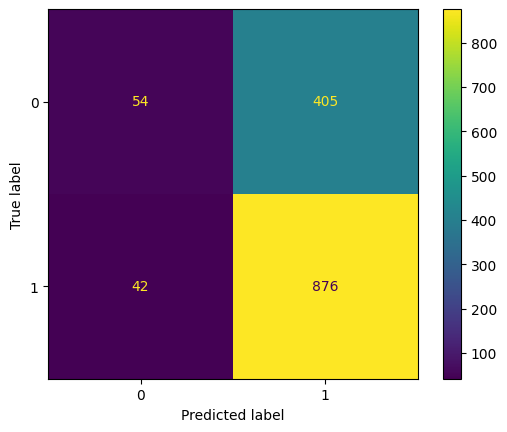

In [ ]:
# create visualization of the confusion matrix for the test set

cm = confusion_matrix(y1_test, grid_search_y1.best_estimator_.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix = cm,
                               display_labels = grid_search_y1.classes_)
disp.plot()

plt.show()